# Limearizações: implementação e discussões

## Introdução

O conceito de limiarização é introduzido em um processo de transformação na imagem com base em limiares pré-definidos. A transformação ocorre mediante a aplicação da seguinte funcão: $g(x,y) = máx$, se $f(x,y) > T$ ou $g(x) = 0$, se $f(x,y) \leq T$, onde $g(x)$ representa o valor de intendidade no ponto em questão.

O resultado é uma imagem com valores discretos, distos entre o máximo e o mínimo da intensidade da imagem.

## Implementação (código-fonte)

Importação dos pacotes utilizados para simulação:

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as m
import navFunc as nf
from navFunc.cls import cls
from IPython.display import Image

Carregar imagem utilizando a função do OpenCV:

In [2]:
img = cv2.imread('lena.png',cv2.IMREAD_GRAYSCALE)

### Definições preliminares:
- Definir o limiar

In [3]:
# Cria variavel do tipo struct (similar ao matlab):

Filter = nf.structtype()                # Cria variavel do tipo struct (similar ao matlab)

Filter.img = np.array(img)

Filter.imgSize = nf.structtype()
Filter.imgSize.lin, Filter.imgSize.col = Filter.img.shape

# Limiar def:

Filter.limiar = 110

numAp = 1;
U = np.zeros((numAp, Filter.imgSize.lin, Filter.imgSize.col))

### Aplicação efetida do método:

In [4]:
#############################################################################################
########### Method apllication:

for k in range(0, numAp):
    if k == 0:
        U[k,:,:] = nf.limiar(Filter)
        print(U[k, :, :])
    else:
        Filter.img = U[k-1,:,:]
        U[k, :, :] = nf.limiar(Filter)
        print(U[k,:,:])

################################
Process finished
Limiar has been applied
################################
[[  13.   13.   13. ...,   13.   13.   13.]
 [  13.   13.   13. ...,   13.   13.   13.]
 [  13.   13.   13. ...,   13.   13.   13.]
 ..., 
 [ 255.  255.  255. ...,   13.   13.  255.]
 [ 255.  255.  255. ...,   13.   13.   13.]
 [ 255.  255.  255. ...,   13.   13.   13.]]


### Exibir resultados:

- Imagem original:

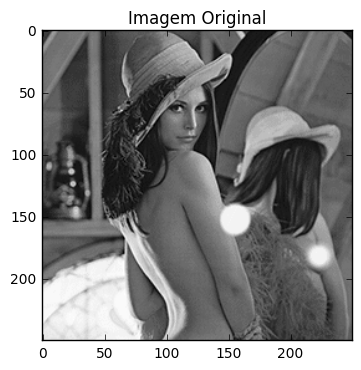

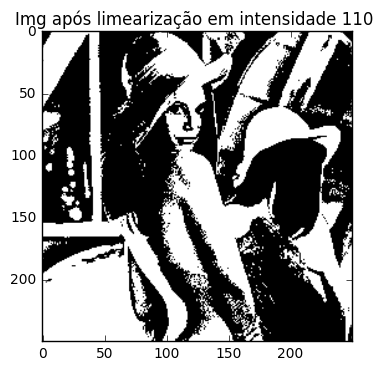

In [5]:
#############################################################################################
########## Plot images:

########## Using matplotlib #################
plt.figure(1)
#plt.subplot(121)
plt.imshow(img, 'gray')
plt.title('Imagem Original')

#plt.subplot(122)
plt.figure(2)
plt.imshow(U[(numAp - 1),:,:], 'gray')
plt.title('Img após limearização em intensidade %d ' %Filter.limiar)
plt.show()

#### Apêndice 01 - Função para cálculo do histograma:

In [6]:
def limiar (Filter):
    ### Imports
    import numpy as np
    import matplotlib.pyplot as plt
    import math as m
    import navFunc as nf

    # Load image into numpy matrix

    A = Filter.img

    size = nf.structtype()
    size.A = nf.structtype()
    size.A.lin, size.A.col = A.shape

    #################### Limiar
    Tmin = np.min(A)
    Tmax = np.max(A)
    D = np.zeros(A.shape)

    for j in range((0), size.A.lin):
        for k in range((0), size.A.col):

            if A[j,k] > Filter.limiar:
                D[j, k] = Tmax
            else:
                D[j, k] = Tmin

    D = np.uint8(D)

    print('################################')
    print('Process finished')
    print('Limiar has been applied')
    print('################################')

    return D

## Discussões sobre o método

### Imagem com distribuição distinta do histograma:

Utilizando uma imagem composta de:
- Objetos predominantes prestos(valor mínimo da escala de intensidade);
- Objetos predominantes brancos(valor máximo da escala de intensidade);
- Fundo com valor em 50% da escala de cinza.

Temos,

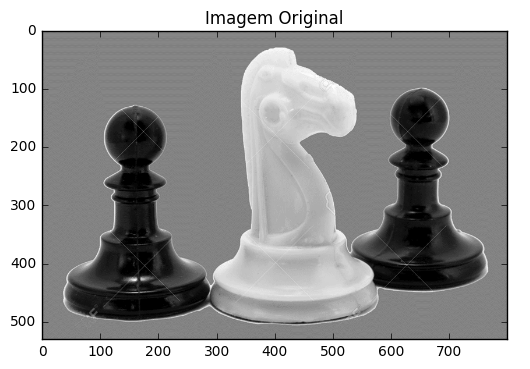

In [7]:
img2 = cv2.imread('xadrez.png',cv2.IMREAD_GRAYSCALE)

plt.figure(1)
#plt.subplot(121)
plt.imshow(img2, 'gray')
plt.title('Imagem Original')
plt.show()

O histrograma dessa imagem possui uma maior densidade em torno do valor médio na escala de cinza (fundo), uma densidade média em regiões próximas a tonalidade de pretos(objetos predominante pretos), e uma densidade menor em valores próximos de branco (objeto predominantemente branco)

################################
Process finished
Histogram has been calculated
################################


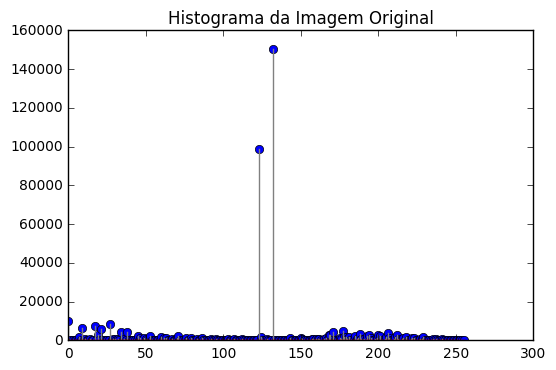

In [8]:
Filter.img = img2

Hist1 = nf.calcHist(Filter.img)

plt.figure(1)
#plt.subplot(121)
plt.stem(Hist1, 'gray')
plt.title('Histograma da Imagem Original')
plt.show()

Aplica-se uma limearização da seguinte forma: 

$g(x,y) = máx $, se $f(x,y) > 120$ ou $g(x) = 0$, se $f(x,y) \leq 120$

Nota-se que é possível enfatizar os objetos pretos, exibido-os e excludino o resto da imagem. O histograma resultante desse processo exibe o "vale" criado entre os valores máximos e mínimos. Tal vale representa a segmentação do objeto.

################################
Process finished
Limiar has been applied
################################


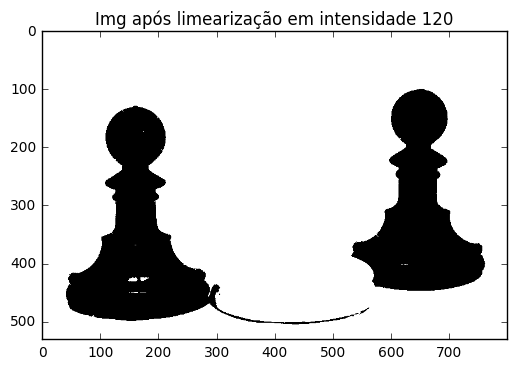

In [9]:
Filter.limiar = 120

Saida = nf.limiar(Filter)

plt.figure(1)
plt.imshow(Saida, 'gray')
plt.title('Img após limearização em intensidade %d' %Filter.limiar)
plt.show()

################################
Process finished
Histogram has been calculated
################################


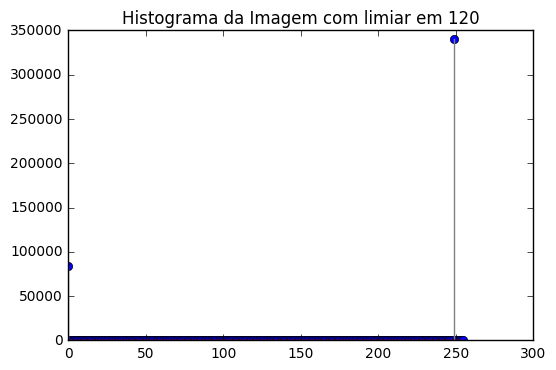

In [10]:
Filter.img = Saida

Hist2 = nf.calcHist(Filter.img)

plt.figure(1)
plt.stem(Hist2, 'gray')
plt.title('Histograma da Imagem com limiar em 120')
plt.show()

Porém, realizando praticamente o processo reverso e definindo o limiar da seguinte forma: 

$g(x,y) = 0 $, se $f(x,y) < 140$ ou $g(x) = max$, se $f(x,y) \geq 140$

Nota-se que é possível enfatizar os objetos brancos, exibido-os e excludino o resto da imagem, assim como seu histograma, que também é o complemento do anterior.

################################
Process finished
Limiar has been applied
################################


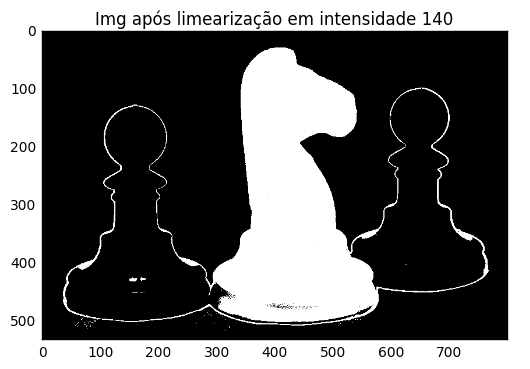

In [11]:
Filter.img = img2

Filter.limiar = 140

Saida2 = nf.limiar2(Filter)

plt.figure(1)
plt.imshow(Saida2, 'gray')
plt.title('Img após limearização em intensidade %d' %Filter.limiar)
plt.show()

################################
Process finished
Histogram has been calculated
################################


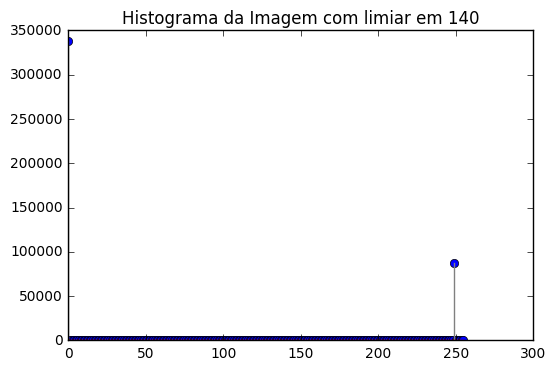

In [12]:
Filter.img = Saida2

Hist3 = nf.calcHist(Filter.img)

plt.figure(1)
plt.stem(Hist3, 'gray')
plt.title('Histograma da Imagem com limiar em 140')
plt.show()

Contudo, se definirmos o valor do limiar próximo a região média de intensidade(aproximadamente 125), aonde encontra-se o fundo cinza, teremos um resultado não ótimo, que destaca bastante o fundo da imagem, mas também os objetos pretos e brancos igualmente, logo essa definição não é adequada para um processo de segmentação. Também é claro ver que o histograma mostra uma distribuição parecidas entre intensidades de pretos e brancos.

################################
Process finished
Limiar has been applied
################################


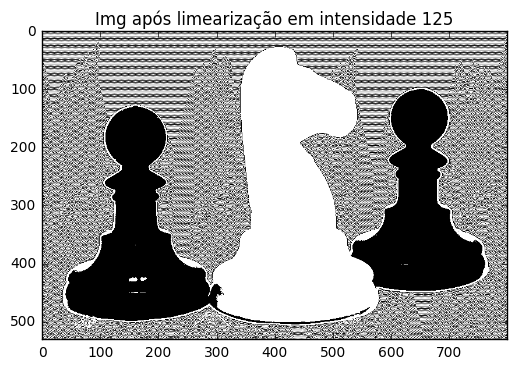

In [13]:
Filter.img = img2

Filter.limiar = 125

Saida = nf.limiar(Filter)

plt.figure(1)
plt.imshow(Saida, 'gray')
plt.title('Img após limearização em intensidade %d' %Filter.limiar)
plt.show()

################################
Process finished
Histogram has been calculated
################################


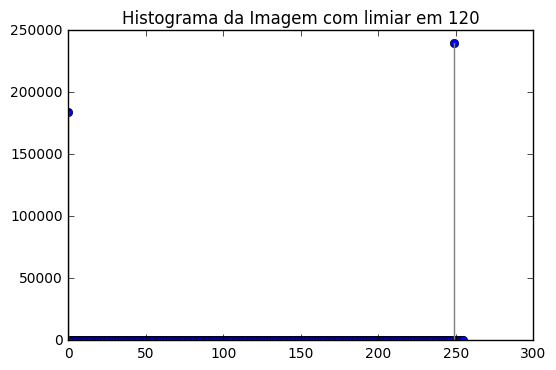

In [14]:
Filter.img = Saida

Hist2 = nf.calcHist(Filter.img)

plt.figure(1)
plt.stem(Hist2, 'gray')
plt.title('Histograma da Imagem com limiar em 120')
plt.show()

O resultado da aplicação do filtro de Sobel provê uma imagem com bastante tons de escuros, devido a característica do método, logo é fácil de perceber a concentração(número de pixels) em tons próximos de preto.

## Conclusões

O processo de limiarização é bastante intuitivo e rápido em sua execução, devido a sua fácil implementação, porém não deixa de ser uma ferramenta poderosa para o caso de segmentação de objetos com cores bastantes ditas.

É importante salientar que antes de aplicar a limiarização deve-se utilizar o histograma da imagem como um direcionamento para a definição do limiar, pois a distribuição de intensidades por pixels nos transmite uma representação das cores da imagem.